In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [133]:
import tqdm as t
t.__version__

'4.62.2'

## define some functions

In [82]:
def load_com_file(filename, sampling_rate=None, time=None):
    '''
    loads center of mass tracking file
    assigns time as index
    
    Parameters:
    ----------
    filename: str
        full path to filename of CSV file
    sampling_rate: float
        sampling rate of acquired COM points
        default = None
    time: array or list
        timestamps associated with each tracking point
        default = None
        If passed, length must match CSV file length
    
    Returns:
    --------
    pandas.dataframe
        columns = time, x, y, filename
    '''
    # load data
    data = pd.read_csv(filename, names = ['x', 'y'])
    
    # calculate time vector if it is not passed
    if time is None:
        assert sampling_rate is not None, 'must pass a sampling rate if not explicitly passing a time vector'
        time = np.arange(0, len(data)/sampling_rate, 1/sampling_rate)
        
    # add time vector to dataframe
    data['time'] = time
    
    # add filename to dataframe
    data['filename'] = filename
    
    col_order = ['time', 'x', 'y', 'filename']
    return data[col_order]

In [124]:
def plot_com(com_data, color_by='time', ax=None, cmap='viridis', colorbar=True, alpha=0.5):
    '''
    makes a plot of position in the open field colored by some parameter
    adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html
    
    Parameters:
    -----------
    com_data: pandas.dataframe
        data to plot
    color_by: str
        parameter by which to color the data
        must be column in `com_data`
    ax: matplotlib axis object
        axis on which to plot
        if None (default), a new axis will be created
    cmap: str
        colormap to use
        
    Returns:
    -------
    None
    '''
    if ax is None:
        fig, ax = plt.subplots()
        
    x = com_data['x']
    y = com_data['y']
    color_by_data = com_data[color_by]

    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color_by_data.min(), color_by_data.max())
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    # Set the values used for colormapping
    lc.set_array(color_by_data)
    lc.set_linewidth(2)
    lc.set_alpha(alpha)
    line = ax.add_collection(lc)
    
    if colorbar:
        colorbar = ax.get_figure().colorbar(line, ax=ax, label=color_by)

    ax.set_xlim(0, x.max()+25)
    ax.set_ylim(0, y.max()+25)
    ax.set_aspect('equal')

In [80]:
# note: the data is actually on science-1 but I can't access it from firefly2. For now, I've copied files to ariel
# behavior_data_path = '/science-1/data/OM/Astellas/social_linear_behavior/Oct2020_Ket_OF'
behavior_data_path = '/ariel/data2/doug/ketamine_pfc_temp/'
csv_files = glob.glob(os.path.join(behavior_data_path,'*.csv'))
csv_files

['/ariel/data2/doug/ketamine_pfc_temp/2020-10-29-14-53-57_video_OM074_OF_10mgkg_rsKet_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-20-12-51-36_video_OM070_OF_saline_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-11-18-11-23-49_video_20201118_OM080_Sal_OF_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-29-10-49-25_video_OM066_OF_saline_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-20-14-10-44_video_OM072_OF_10mgkg_rsKet_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-20-11-31-07_video_OM066_OF_10mgkg_rsKet_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-11-18-13-21-02_video_20201118_OM080_10mgkg_Ket_OF_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-29-13-29-04_video_OM072_OF_saline_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-29-12-09-45_video_OM070_OF_10mgkg_rsKet_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-10-29-16-45-29_video_OM076_OF_saline_COM.csv',
 '/ariel/data2/doug/ketamine_pfc_temp/2020-11-05-12-57-21

In [83]:
com = load_com_file(os.path.join(behavior_data_path, '2020-10-29-14-53-57_video_OM074_OF_10mgkg_rsKet_COM.csv'), sampling_rate=20)
com

,time,x,y,filename
0,0.00,70.0,57.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
1,0.05,69.0,59.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
2,0.10,69.0,61.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
3,0.15,68.0,63.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
4,0.20,66.0,66.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
...,...,...,...,...
83958,4197.90,294.0,261.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
83959,4197.95,294.0,261.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
83960,4198.00,294.0,261.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...
83961,4198.05,294.0,261.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...


In [105]:
all_data = []
for csv_file in tqdm(csv_files):
    all_data.append(load_com_file(csv_file, sampling_rate=20))
all_data = pd.concat(all_data)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 34.45it/s]


## parse filenames to get mouse ID and injection type

In [107]:
all_data['mouse'] = all_data['filename'].map(lambda fn: 'OM'+fn.split('OM')[1].split('_')[0])
def get_injection_type(filename):
    if 'sal' in filename.lower():
        return 'saline'
    elif 'ket' in filename.lower():
        return 'ketamine'
    else:
        return 'unknown'
all_data['injection_type'] = all_data['filename'].map(lambda fn: get_injection_type(fn))
all_data.sample(10)

,time,x,y,filename,mouse,injection_type
46846,2342.30,27.0,227.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...,OM076,saline
47325,2366.25,344.0,54.0,/ariel/data2/doug/ketamine_pfc_temp/2020-11-18...,OM080,ketamine
18118,905.90,236.0,80.0,/ariel/data2/doug/ketamine_pfc_temp/2020-11-18...,OM080,ketamine
20397,1019.85,366.0,68.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...,OM072,saline
67070,3353.50,398.0,400.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-21...,OM078,saline
677,33.85,38.0,153.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-20...,OM076,ketamine
2206,110.30,103.0,402.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-29...,OM066,saline
56853,2842.65,56.0,74.0,/ariel/data2/doug/ketamine_pfc_temp/2020-11-18...,OM080,ketamine
40564,2028.20,43.0,330.0,/ariel/data2/doug/ketamine_pfc_temp/2020-11-18...,OM080,ketamine
40442,2022.10,68.0,374.0,/ariel/data2/doug/ketamine_pfc_temp/2020-10-20...,OM074,saline


In [103]:
mice = np.sort(all_data['mouse_id'].unique())
mice

array(['OM066', 'OM070', 'OM072', 'OM074', 'OM076', 'OM078', 'OM080'],
      dtype=object)

## plot a single open field session

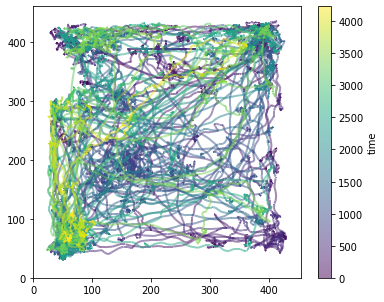

In [125]:
filename = csv_files[1]
fig, ax = plt.subplots(figsize=(6,5))
plot_com(all_data.query('mouse == "OM066" and injection_type == "ketamine"'), color_by='time', ax=ax, cmap='viridis', colorbar=True)

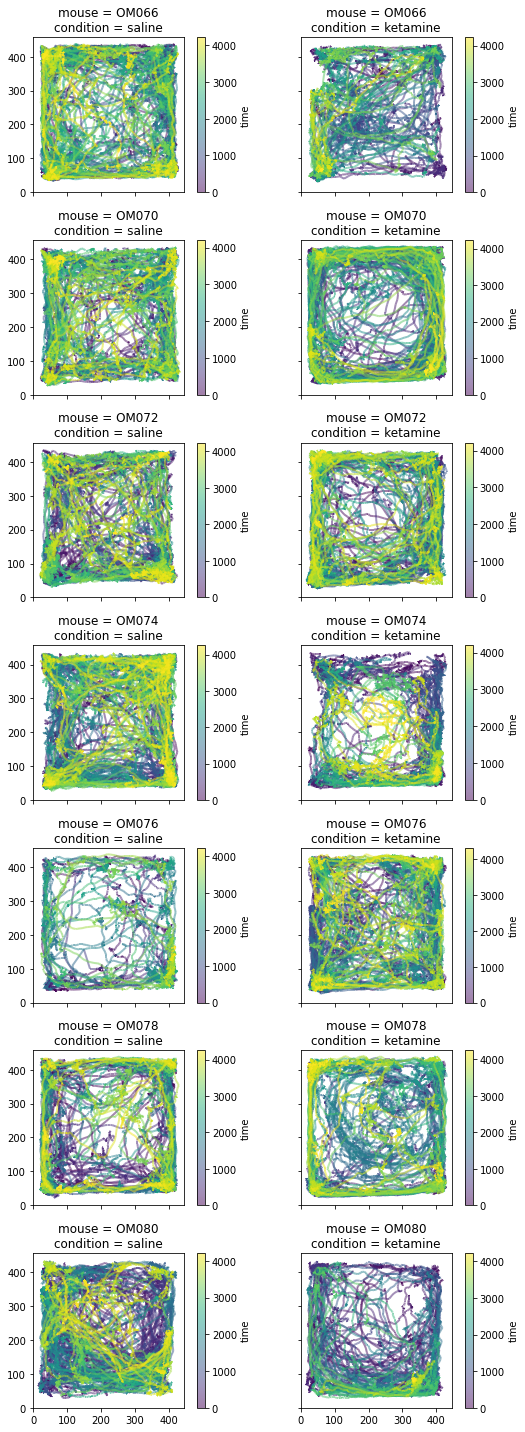

In [128]:
fig, ax = plt.subplots(len(mice), 2, sharex=True, sharey=True, figsize=(8,20))
for row, mouse in enumerate(mice):
    for col, condition in enumerate(['saline', 'ketamine']):
        plot_com(
            all_data.query('mouse == @mouse and injection_type == @condition'), 
            color_by='time', 
            ax=ax[row, col], 
            cmap='viridis', 
            colorbar=True
        )
        ax[row, col].set_title('mouse = {}\ncondition = {}'.format(mouse, condition))
        
        
fig.tight_layout()

(-1.1, 1.1)

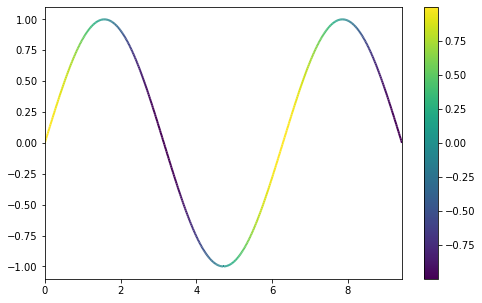

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(8,5))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.1, 1.1)
# plt.show()

(-1.1, 1.1)

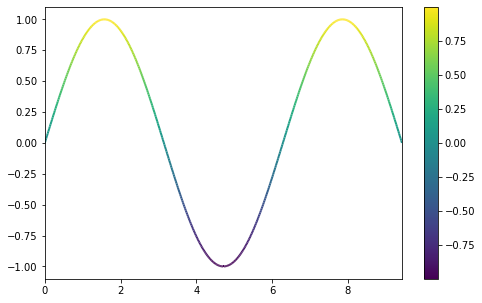

In [56]:
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
colorby = y

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(8,5))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(colorby.min(), colorby.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(colorby)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.1, 1.1)

In [49]:
segments

array([[[ 70.,  57.],
        [ 69.,  59.]],

       [[ 69.,  59.],
        [ 69.,  61.]],

       [[ 69.,  61.],
        [ 68.,  63.]],

       ...,

       [[294., 261.],
        [294., 261.]],

       [[294., 261.],
        [294., 261.]],

       [[294., 261.],
        [294., 261.]]])

In [139]:
2**12

4096